# Color Psychology in Art History

## Introduction

Colors are not just visual—they're **emotional**. Artists have long understood that color choices can evoke specific psychological responses: red for passion, blue for calm, yellow for joy.

In this lesson, we'll explore how master artists have used color psychology and build tools to analyze emotional color content.

### What You'll Learn

- Color-emotion associations in art
- How to quantify emotional content through color
- Comparing emotional palettes across artists
- Building an "emotional color score" system

### Color Psychology Basics

| Color | Common Associations |
|-------|--------------------|
| **Red** | Passion, danger, energy, love |
| **Orange** | Warmth, creativity, enthusiasm |
| **Yellow** | Joy, optimism, caution |
| **Green** | Nature, growth, harmony, envy |
| **Blue** | Calm, trust, sadness, depth |
| **Purple** | Royalty, mystery, spirituality |
| **Brown** | Earthiness, stability, comfort |
| **Black** | Power, elegance, death, mystery |
| **White** | Purity, innocence, emptiness |

Let's analyze how artists use these associations!

## Setup

In [1]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorAnalyzer, ColorVisualizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple

# Initialize
artist_analyzer = ArtistAnalyzer()
color_extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()
visualizer = ColorVisualizer()

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print("Setup complete!")

Setup complete!


## Part 1: Building a Color Psychology System

In [2]:
class ColorPsychologyAnalyzer:
    """
    Analyze the psychological/emotional content of color palettes.
    """
    
    # Define hue ranges and their emotional associations
    # Hue is measured in degrees (0-360)
    HUE_EMOTIONS = {
        'red': {'range': (0, 15), 'emotions': ['passion', 'energy', 'danger', 'love']},
        'red_orange': {'range': (15, 30), 'emotions': ['excitement', 'warmth', 'creativity']},
        'orange': {'range': (30, 45), 'emotions': ['enthusiasm', 'warmth', 'playfulness']},
        'yellow_orange': {'range': (45, 60), 'emotions': ['optimism', 'happiness', 'energy']},
        'yellow': {'range': (60, 75), 'emotions': ['joy', 'optimism', 'intellect', 'caution']},
        'yellow_green': {'range': (75, 105), 'emotions': ['freshness', 'growth', 'renewal']},
        'green': {'range': (105, 150), 'emotions': ['nature', 'harmony', 'balance', 'growth']},
        'cyan': {'range': (150, 195), 'emotions': ['calm', 'clarity', 'freshness']},
        'blue': {'range': (195, 255), 'emotions': ['trust', 'calm', 'sadness', 'depth']},
        'purple': {'range': (255, 285), 'emotions': ['royalty', 'mystery', 'spirituality']},
        'magenta': {'range': (285, 330), 'emotions': ['creativity', 'imagination', 'passion']},
        'red_magenta': {'range': (330, 360), 'emotions': ['passion', 'energy', 'love']}
    }
    
    # Emotional valence scores (positive/negative)
    EMOTION_VALENCE = {
        'joy': 1.0, 'optimism': 0.9, 'happiness': 1.0, 'love': 0.8,
        'passion': 0.6, 'energy': 0.7, 'enthusiasm': 0.8, 'creativity': 0.7,
        'warmth': 0.6, 'playfulness': 0.8, 'freshness': 0.5, 'growth': 0.6,
        'nature': 0.5, 'harmony': 0.6, 'balance': 0.5, 'renewal': 0.6,
        'calm': 0.4, 'clarity': 0.5, 'trust': 0.5, 'depth': 0.0,
        'spirituality': 0.3, 'mystery': 0.0, 'imagination': 0.5,
        'royalty': 0.3, 'intellect': 0.4, 'excitement': 0.7,
        'sadness': -0.7, 'danger': -0.5, 'caution': -0.2
    }
    
    # Arousal scores (high energy/low energy)
    EMOTION_AROUSAL = {
        'passion': 0.9, 'energy': 0.9, 'excitement': 0.9, 'danger': 0.8,
        'enthusiasm': 0.7, 'creativity': 0.6, 'joy': 0.7, 'playfulness': 0.6,
        'optimism': 0.5, 'happiness': 0.6, 'warmth': 0.3, 'love': 0.5,
        'freshness': 0.3, 'growth': 0.2, 'nature': 0.1, 'harmony': 0.0,
        'balance': 0.0, 'renewal': 0.2, 'calm': -0.5, 'clarity': -0.2,
        'trust': -0.3, 'depth': -0.4, 'spirituality': -0.3, 'mystery': -0.2,
        'imagination': 0.3, 'royalty': 0.1, 'intellect': -0.1, 'caution': 0.2,
        'sadness': -0.6
    }
    
    def __init__(self):
        self.color_analyzer = ColorAnalyzer()
    
    def classify_color_emotion(self, rgb: Tuple[int, int, int]) -> Dict:
        """
        Classify a color's emotional content.
        """
        hsv = self.color_analyzer.rgb_to_hsv(rgb)
        hue, saturation, value = hsv
        
        # Find matching hue category
        color_name = 'neutral'
        emotions = []
        
        # Check if color is desaturated (gray/neutral)
        if saturation < 15:
            if value < 30:
                return {'category': 'black', 'emotions': ['power', 'mystery', 'elegance'],
                        'valence': -0.2, 'arousal': 0.1}
            elif value > 85:
                return {'category': 'white', 'emotions': ['purity', 'innocence', 'clarity'],
                        'valence': 0.3, 'arousal': -0.3}
            else:
                return {'category': 'gray', 'emotions': ['neutrality', 'balance', 'calm'],
                        'valence': 0.0, 'arousal': -0.4}
        
        # Classify by hue
        for name, data in self.HUE_EMOTIONS.items():
            low, high = data['range']
            if low <= hue < high:
                color_name = name
                emotions = data['emotions']
                break
        
        # Calculate average valence and arousal
        valences = [self.EMOTION_VALENCE.get(e, 0) for e in emotions]
        arousals = [self.EMOTION_AROUSAL.get(e, 0) for e in emotions]
        
        avg_valence = sum(valences) / len(valences) if valences else 0
        avg_arousal = sum(arousals) / len(arousals) if arousals else 0
        
        # Modulate by saturation and value
        # Higher saturation = more intense emotion
        intensity = saturation / 100
        avg_arousal *= intensity
        
        return {
            'category': color_name,
            'emotions': emotions,
            'valence': avg_valence,
            'arousal': avg_arousal,
            'intensity': intensity
        }
    
    def analyze_palette_emotions(self, colors: List[Tuple[int, int, int]]) -> Dict:
        """
        Analyze the emotional content of a color palette.
        """
        all_emotions = []
        valences = []
        arousals = []
        categories = []
        
        for color in colors:
            result = self.classify_color_emotion(color)
            all_emotions.extend(result['emotions'])
            valences.append(result['valence'])
            arousals.append(result['arousal'])
            categories.append(result['category'])
        
        # Count emotion frequencies
        from collections import Counter
        emotion_counts = Counter(all_emotions)
        category_counts = Counter(categories)
        
        return {
            'dominant_emotions': emotion_counts.most_common(5),
            'dominant_categories': category_counts.most_common(5),
            'mean_valence': sum(valences) / len(valences) if valences else 0,
            'mean_arousal': sum(arousals) / len(arousals) if arousals else 0,
            'emotional_range': max(valences) - min(valences) if valences else 0,
            'mood': self._classify_mood(sum(valences)/len(valences), sum(arousals)/len(arousals))
        }
    
    def _classify_mood(self, valence: float, arousal: float) -> str:
        """
        Classify overall mood based on valence and arousal.
        Uses the circumplex model of affect.
        """
        if valence > 0.3 and arousal > 0.3:
            return 'Excited/Joyful'
        elif valence > 0.3 and arousal < -0.3:
            return 'Calm/Serene'
        elif valence < -0.3 and arousal > 0.3:
            return 'Tense/Anxious'
        elif valence < -0.3 and arousal < -0.3:
            return 'Sad/Depressed'
        elif valence > 0.3:
            return 'Pleasant'
        elif valence < -0.3:
            return 'Unpleasant'
        elif arousal > 0.3:
            return 'Activated/Energetic'
        elif arousal < -0.3:
            return 'Deactivated/Calm'
        else:
            return 'Neutral'

# Test the analyzer
psych_analyzer = ColorPsychologyAnalyzer()

test_colors = [
    (255, 0, 0),    # Red
    (0, 0, 255),    # Blue
    (255, 255, 0),  # Yellow
]

print("Color Psychology Analysis Examples:")
print("="*50)
for color in test_colors:
    result = psych_analyzer.classify_color_emotion(color)
    print(f"\nRGB {color}:")
    print(f"  Category: {result['category']}")
    print(f"  Emotions: {', '.join(result['emotions'])}")
    print(f"  Valence: {result['valence']:.2f} (positive/negative)")
    print(f"  Arousal: {result['arousal']:.2f} (energy level)")

Color Psychology Analysis Examples:

RGB (255, 0, 0):
  Category: red
  Emotions: passion, energy, danger, love
  Valence: 0.40 (positive/negative)
  Arousal: 0.78 (energy level)

RGB (0, 0, 255):
  Category: blue
  Emotions: trust, calm, sadness, depth
  Valence: 0.05 (positive/negative)
  Arousal: -0.45 (energy level)

RGB (255, 255, 0):
  Category: yellow
  Emotions: joy, optimism, intellect, caution
  Valence: 0.53 (positive/negative)
  Arousal: 0.33 (energy level)


## Part 2: Analyzing Artist Emotional Palettes

In [3]:
# Analyze emotional content of different artists
artists_to_analyze = [
    ('pierre-auguste-renoir', 'Renoir'),
    ('edvard-munch', 'Munch'),
    ('claude-monet', 'Monet'),
    ('pablo-picasso', 'Picasso'),
    ('vincent-van-gogh', 'Van Gogh')
]

artist_emotions = {}

for artist_id, artist_name in artists_to_analyze:
    print(f"\nAnalyzing {artist_name}...")
    
    works = artist_analyzer.extract_artist_works(artist_id, limit=10)
    
    if not works:
        continue
    
    all_colors = []
    for work in works:
        try:
            palette = color_extractor.extract_dominant_colors(work['image'], n_colors=5)
            all_colors.extend(palette)
        except:
            pass
    
    if all_colors:
        emotions = psych_analyzer.analyze_palette_emotions(all_colors)
        artist_emotions[artist_name] = emotions
        print(f"  Mood: {emotions['mood']}")
        print(f"  Top emotions: {[e[0] for e in emotions['dominant_emotions'][:3]]}")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")


Analyzing Renoir...
Loading WikiArt dataset...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✓ Loaded 81444 artworks
✓ Found 10 works by pierre-auguste-renoir
  Mood: Pleasant
  Top emotions: ['warmth', 'enthusiasm', 'playfulness']

Analyzing Munch...
✓ Found 10 works by edvard-munch
  Mood: Pleasant
  Top emotions: ['warmth', 'energy', 'excitement']

Analyzing Monet...
✓ Found 10 works by claude-monet
  Mood: Pleasant
  Top emotions: ['calm', 'neutrality', 'balance']

Analyzing Picasso...
✓ Found 10 works by pablo-picasso
  Mood: Pleasant
  Top emotions: ['warmth', 'excitement', 'creativity']

Analyzing Van Gogh...
✓ Found 10 works by vincent-van-gogh
  Mood: Pleasant
  Top emotions: ['warmth', 'enthusiasm', 'playfulness']

ANALYSIS COMPLETE


## Part 3: Visualize Emotional Profiles

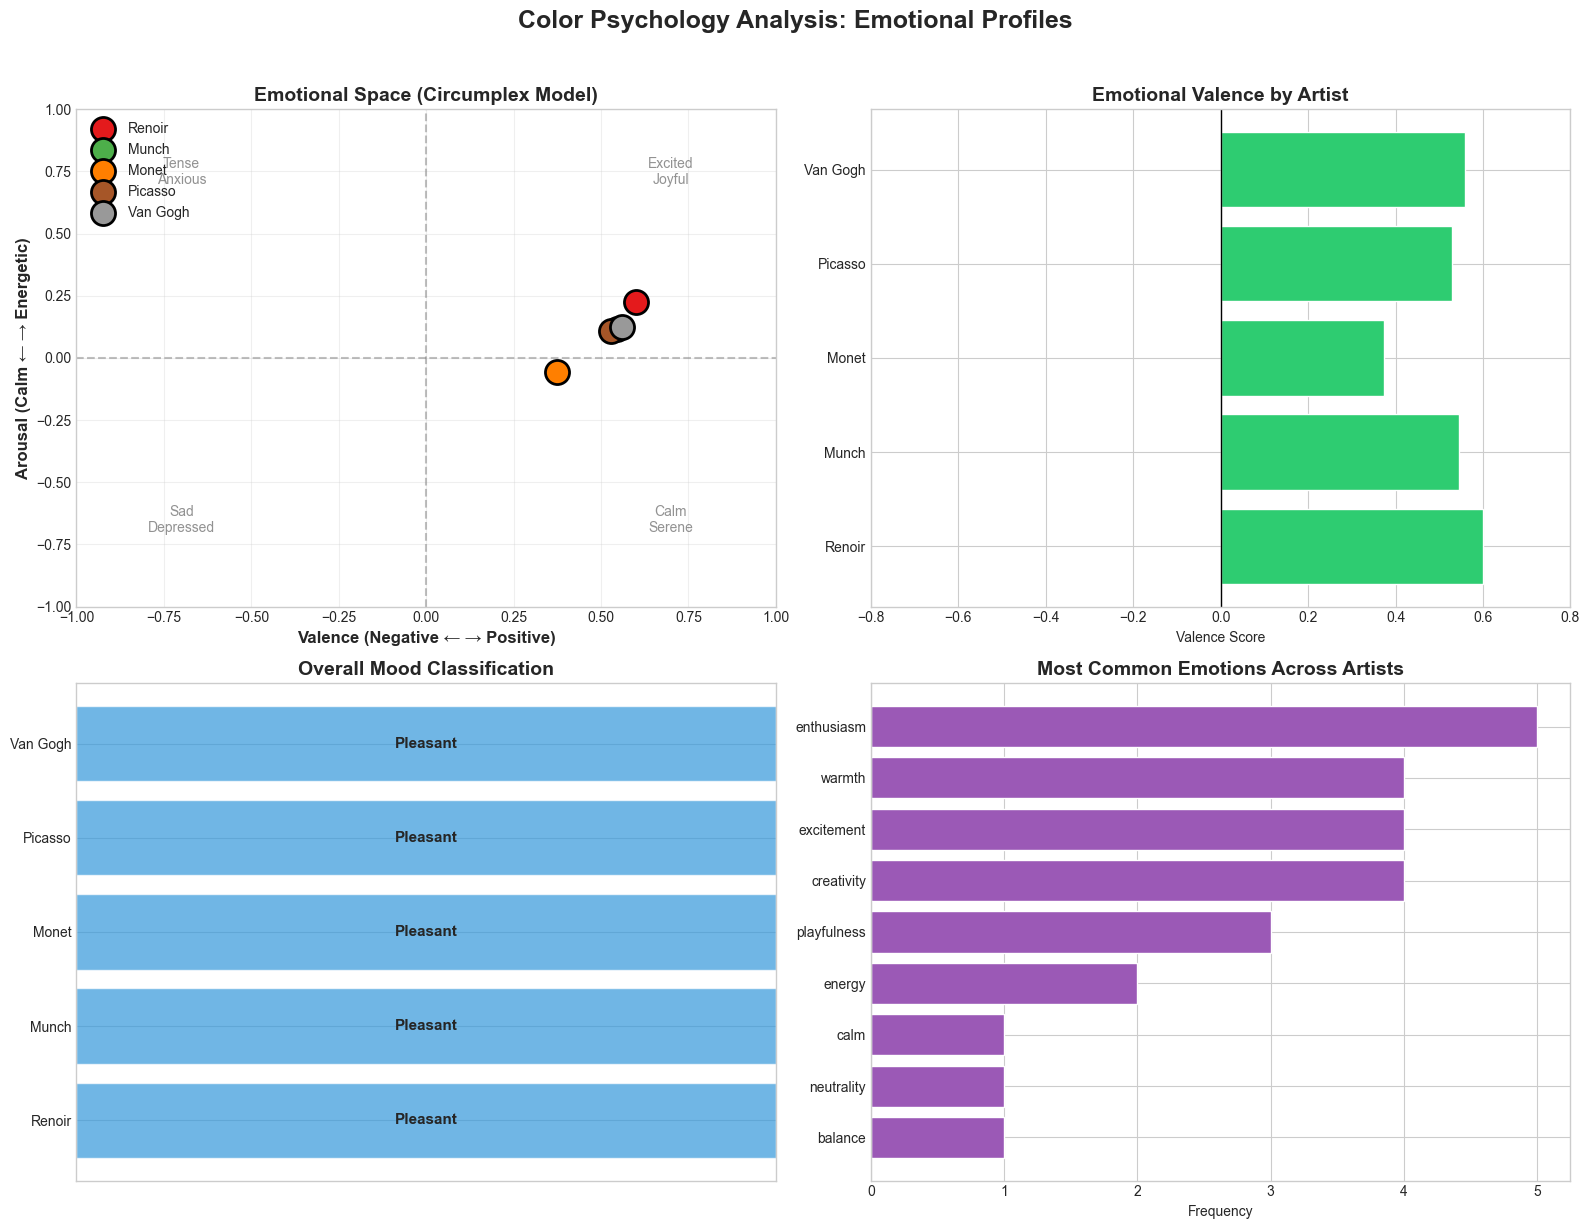

In [4]:
# Create emotional profile visualization
if artist_emotions:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    artists = list(artist_emotions.keys())
    
    # 1. Valence-Arousal Space (Circumplex)
    ax = axes[0, 0]
    colors_scatter = plt.cm.Set1(np.linspace(0, 1, len(artists)))
    
    for i, (artist, data) in enumerate(artist_emotions.items()):
        ax.scatter(data['mean_valence'], data['mean_arousal'], 
                  s=300, c=[colors_scatter[i]], label=artist, 
                  edgecolors='black', linewidth=2)
    
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.set_xlabel('Valence (Negative ← → Positive)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Arousal (Calm ← → Energetic)', fontsize=12, fontweight='bold')
    ax.set_title('Emotional Space (Circumplex Model)', fontsize=14, fontweight='bold')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Add quadrant labels
    ax.text(0.7, 0.7, 'Excited\nJoyful', ha='center', fontsize=10, alpha=0.5)
    ax.text(-0.7, 0.7, 'Tense\nAnxious', ha='center', fontsize=10, alpha=0.5)
    ax.text(0.7, -0.7, 'Calm\nSerene', ha='center', fontsize=10, alpha=0.5)
    ax.text(-0.7, -0.7, 'Sad\nDepressed', ha='center', fontsize=10, alpha=0.5)
    
    # 2. Valence Comparison
    ax = axes[0, 1]
    valences = [artist_emotions[a]['mean_valence'] for a in artists]
    colors_bar = ['#2ecc71' if v > 0 else '#e74c3c' for v in valences]
    bars = ax.barh(artists, valences, color=colors_bar)
    ax.axvline(x=0, color='black', linewidth=1)
    ax.set_xlabel('Valence Score')
    ax.set_title('Emotional Valence by Artist', fontsize=14, fontweight='bold')
    ax.set_xlim(-0.8, 0.8)
    
    # 3. Mood Distribution
    ax = axes[1, 0]
    moods = [artist_emotions[a]['mood'] for a in artists]
    y_pos = range(len(artists))
    ax.barh(y_pos, [1]*len(artists), color='#3498db', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(artists)
    for i, (artist, mood) in enumerate(zip(artists, moods)):
        ax.text(0.5, i, mood, ha='center', va='center', fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_title('Overall Mood Classification', fontsize=14, fontweight='bold')
    
    # 4. Top Emotions Word Cloud (simplified as bar chart)
    ax = axes[1, 1]
    # Aggregate all emotions
    from collections import Counter
    all_top_emotions = []
    for data in artist_emotions.values():
        all_top_emotions.extend([e[0] for e in data['dominant_emotions']])
    emotion_counts = Counter(all_top_emotions).most_common(10)
    
    emotions, counts = zip(*emotion_counts)
    ax.barh(range(len(emotions)), counts, color='#9b59b6')
    ax.set_yticks(range(len(emotions)))
    ax.set_yticklabels(emotions)
    ax.set_xlabel('Frequency')
    ax.set_title('Most Common Emotions Across Artists', fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    
    plt.suptitle('Color Psychology Analysis: Emotional Profiles', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## Part 4: Case Study - Emotional Analysis

Let's do a deep dive into one artist's emotional color journey.

In [5]:
# Deep analysis of Munch (known for emotional expressionism)
print("Deep Analysis: Edvard Munch's Emotional Palette")
print("="*60)

munch_works = artist_analyzer.extract_artist_works('edvard-munch', limit=15)

if munch_works:
    work_emotions = []
    
    for work in munch_works:
        try:
            palette = color_extractor.extract_dominant_colors(work['image'], n_colors=5)
            emotions = psych_analyzer.analyze_palette_emotions(palette)
            
            work_emotions.append({
                'title': work.get('title', 'Untitled'),
                'valence': emotions['mean_valence'],
                'arousal': emotions['mean_arousal'],
                'mood': emotions['mood'],
                'top_emotion': emotions['dominant_emotions'][0][0] if emotions['dominant_emotions'] else 'N/A'
            })
        except:
            pass
    
    # Display results
    df = pd.DataFrame(work_emotions)
    print(df.to_string(index=False))
    
    # Average emotional profile
    print(f"\n{'─'*40}")
    print(f"MUNCH'S AVERAGE EMOTIONAL PROFILE")
    print(f"{'─'*40}")
    print(f"Average Valence: {df['valence'].mean():.2f}")
    print(f"Average Arousal: {df['arousal'].mean():.2f}")
    print(f"Most Common Mood: {df['mood'].mode()[0]}")

Deep Analysis: Edvard Munch's Emotional Palette
✓ Found 15 works by edvard-munch
   title  valence   arousal           mood top_emotion
Untitled 0.360000  0.113579       Pleasant  enthusiasm
Untitled 0.140000 -0.253949        Neutral        calm
Untitled 0.493333  0.137090       Pleasant      warmth
Untitled 0.590000  0.136200       Pleasant  excitement
Untitled 0.866667  0.252584       Pleasant    optimism
Untitled 0.673333  0.055949       Pleasant  enthusiasm
Untitled 0.413333 -0.017944       Pleasant     passion
Untitled 0.733333  0.276475       Pleasant      warmth
Untitled 0.566667  0.387709 Excited/Joyful     passion
Untitled 0.600000  0.151929       Pleasant  excitement
Untitled 0.333333  0.291574       Pleasant     passion
Untitled 0.786667  0.278979       Pleasant  enthusiasm
Untitled 0.520000  0.226719       Pleasant      warmth
Untitled 0.150000 -0.203643        Neutral        calm
Untitled 0.586667  0.111663       Pleasant  enthusiasm

──────────────────────────────────────

## Part 5: Key Insights

### What We've Learned

1. **Color carries emotional meaning** - Different hues evoke different psychological responses
2. **Artists have emotional signatures** - Each artist tends toward certain emotional palettes
3. **Movement matters** - Expressionists use more emotionally intense colors than Impressionists
4. **Quantification is possible** - We can measure emotional content through valence/arousal

### Limitations to Consider

- Color psychology varies by culture
- Context affects color perception
- Individual associations differ
- Historical color meanings change

### Applications

- Art therapy analysis
- Movie/game mood design
- Marketing and branding
- Personal artwork analysis

In [ ]:
# YOUR CODE HERE
# Try analyzing other artists:
# - 'mark-rothko' (Color Field - emotional color blocks)
# - 'wassily-kandinsky' (Abstract - intentional color psychology)
# - 'frida-kahlo' (Surrealism - emotional personal work)



---

## Conclusion

You've built a color psychology analysis system that:
- Maps colors to emotional associations
- Calculates valence (positive/negative) and arousal (energy level)
- Classifies overall mood using the circumplex model
- Compares emotional profiles across artists

**Key Insight**: Art is not just visual—it's emotional communication through color!